# Notebook servant pour l'analyse exploratoire du projet "NutriScore"

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nutri = pd.read_csv("cleaned_openfoodfacts.csv", sep='\t', parse_dates=[1,3], low_memory=False)

nutri.head()

code last_modified_datetime   creator    created_datetime  \
0  3760029248001    2016-12-23 16:38:19  stephane 2012-01-31 14:43:58   
1  3029330062806    2016-12-23 16:38:19  stephane 2012-02-09 10:34:56   
2  3257980112590    2016-03-26 18:23:42  marianne 2012-02-11 14:51:07   
3  3160181210524    2014-06-27 16:50:06  stephane 2012-02-11 18:51:58   
4  7613031264285    2014-12-31 03:07:48     andre 2012-02-12 08:51:55   

                                                 url  \
0  http://world-fr.openfoodfacts.org/produit/3760...   
1  http://world-fr.openfoodfacts.org/produit/3029...   
2  http://world-fr.openfoodfacts.org/produit/3257...   
3  http://world-fr.openfoodfacts.org/produit/3160...   
4  http://world-fr.openfoodfacts.org/produit/7613...   

                                           states_fr countries_fr  \
0  A vérifier,Complet,Informations nutritionnelle...       France   
1  A compléter,Informations nutritionnelles compl...       France   
2  A vérifier,Complet,Informations nutritionnelle...       France   
3  A vérifier,Complet,Informations nutritionnelle...       France   
4  A vérifier,Complet,Informations nutritionnelle...      Pologne   

                                        product_name          brands  \
0  Caramels tendres au beurre salé au sel de Guér...      Carabreizh   
1            Jacquet Les bouchées créatives à garnir         Jacquet   
2                                           Boudoirs            Cora   
3                      Cookies tout chocolat Biocoop         Biocoop   
4                              SMACZNA ZUPA Grochova  WINIARY,Nestlé   

   energy_100g  ...  nutrition-score-fr_100g  fiber_100g   additives_tags  \
0       1717.0  ...                     28.0         1.1        e500,e322   
1       1898.0  ...                      9.0         3.0             e920   
2       1637.0  ...                     13.0         1.5  e450i,e500,e503   
3       2040.0  ...                     19.0         5.5        e322,e503   
4        159.0  ...                      3.0         0.7  e1400,e621,e635   

        pnns_groups_2  pnns_groups_1  \
0              sweets  sugary snacks   
1          appetizers   salty snacks   
2  biscuits and cakes  sugary snacks   
3  biscuits and cakes  sugary snacks   
4             unknown        unknown   

                                       categories_fr        main_category_fr  \
0        Epicerie,Snacks sucrés,Confiseries,Caramels                Epicerie   
1           Snacks salés,Apéritif,Biscuits apéritifs            Snacks salés   
2  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...                Biscuits   
3  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...                 Cookies   
4                             pl:Soupes-deshydratees  pl:Soupes-deshydratees   

  additives_n2  fruits-legumes-ratio_100g  sat-fat_ratio  
0            2                         20       0.642202  
1            1                         20       0.083871  
2            3                         20       0.281250  
3            2                         20       0.560000  
4            3                         20       0.375000  

[5 rows x 28 columns]

In [3]:
import os.path, time
print("Dernière modification: %s" % time.ctime(os.path.getmtime("cleaned_openfoodfacts.csv")))

Dernière modification: Wed Jun 29 19:12:15 2022


In [4]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222099 entries, 0 to 222098
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   code                       222099 non-null  object        
 1   last_modified_datetime     222099 non-null  datetime64[ns]
 2   creator                    222099 non-null  object        
 3   created_datetime           222099 non-null  datetime64[ns]
 4   url                        222099 non-null  object        
 5   states_fr                  222099 non-null  object        
 6   countries_fr               222042 non-null  object        
 7   product_name               222099 non-null  object        
 8   brands                     222099 non-null  object        
 9   energy_100g                222099 non-null  float64       
 10  proteins_100g              222099 non-null  float64       
 11  salt_100g                  222099 non-null  float64 

In [5]:
nutritest = nutri.sort_values(["created_datetime"], ascending=False)
nutritest.head()

code last_modified_datetime         creator  \
222097  8714100691496    2017-04-20 21:13:10         kiliweb   
222096  8714100685273    2017-04-20 21:08:16         kiliweb   
222095  5997684504434    2017-04-20 21:26:31  bojackhorseman   
222094  3415581510003    2017-04-20 21:03:08         kiliweb   
222093  3415587517013    2017-04-20 22:17:38         kiliweb   

          created_datetime                                                url  \
222097 2017-04-20 21:13:06  http://world-fr.openfoodfacts.org/produit/8714...   
222096 2017-04-20 21:08:13  http://world-fr.openfoodfacts.org/produit/8714...   
222095 2017-04-20 21:04:53  http://world-fr.openfoodfacts.org/produit/5997...   
222094 2017-04-20 21:03:04  http://world-fr.openfoodfacts.org/produit/3415...   
222093 2017-04-20 20:57:44  http://world-fr.openfoodfacts.org/produit/3415...   

                                                states_fr countries_fr  \
222097  A compléter,Informations nutritionnelles compl...       France   
222096  A compléter,Informations nutritionnelles compl...       France   
222095  A vérifier,Complet,Informations nutritionnelle...       Serbie   
222094  A compléter,Informations nutritionnelles compl...       France   
222093  A compléter,Informations nutritionnelles compl...       France   

              product_name        brands  energy_100g  ...  \
222097              Magnum  Intense Dark       1377.0  ...   
222096      Double Coconut        Magnum       1138.0  ...   
222095    Creamy sa šunkom     Pannontej       1163.0  ...   
222094  Flowers collection   Häagen-dazs       1004.0  ...   
222093           Speculoos   Häagen-dazs       1540.0  ...   

        nutrition-score-fr_100g  fiber_100g  \
222097                     19.0         0.0   
222096                     21.0         1.5   
222095                      NaN         0.0   
222094                     14.0         0.3   
222093                     19.0         0.1   

                             additives_tags  pnns_groups_2  \
222097             e322,e471,e442,e410,e407        unknown   
222096  e410,e407,e412,e471,e442,e476,e14xx        unknown   
222095                     e339i,e452i,e407         cheese   
222094                                 e440        unknown   
222093                            e322,e500      ice cream   

                  pnns_groups_1  \
222097                  unknown   
222096                  unknown   
222095  milk and dairy products   
222094                  unknown   
222093  milk and dairy products   

                                            categories_fr  \
222097                                            unknown   
222096                                            unknown   
222095  Produits à tartiner,Produits à tartiner salés,...   
222094                                            unknown   
222093  Desserts,Surgelés,Desserts glacés,Glaces et so...   

                 main_category_fr additives_n2  fruits-legumes-ratio_100g  \
222097                    unknown            5                         20   
222096                    unknown            7                         20   
222095  Produits à tartiner salés            3                         20   
222094                    unknown            1                         20   
222093                     Glaces            2                         50   

        sat-fat_ratio  
222097       0.714286  
222096       0.666276  
222095       0.239200  
222094       0.601351  
222093       0.612167  

[5 rows x 28 columns]

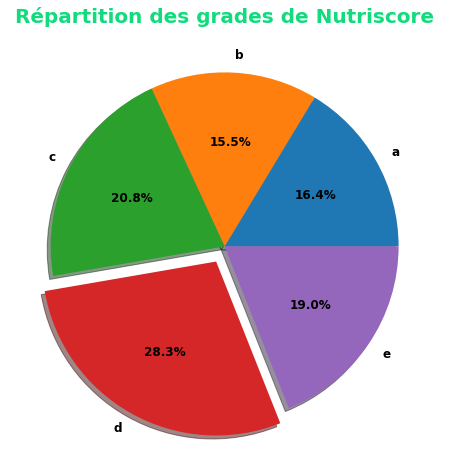

In [17]:
nutrigrades = nutri.groupby(by='nutrition_grade_fr')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

font_title = {'family': 'DejaVu Sans',
              'color':  '#12db7d',
              'weight': 'bold',
              'size': 20,
             }

nutrigrades = nutrigrades.sort_index()

explodes = np.zeros(5) 
explodes[3] = .1 # pour faire ressortir la part la plus importante

plt.pie(nutrigrades, labels=nutrigrades.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des grades de NutriScore", fontdict=font_title)
plt.show()

In [18]:
#On s'occupe ici uniquement des nutriscores et nutrigrades complétés
datas_nutri = nutri[(nutri['nutrition_grade_fr'].isnull()==False) & 
                   (nutri['nutrition-score-fr_100g'].isnull()==False)]

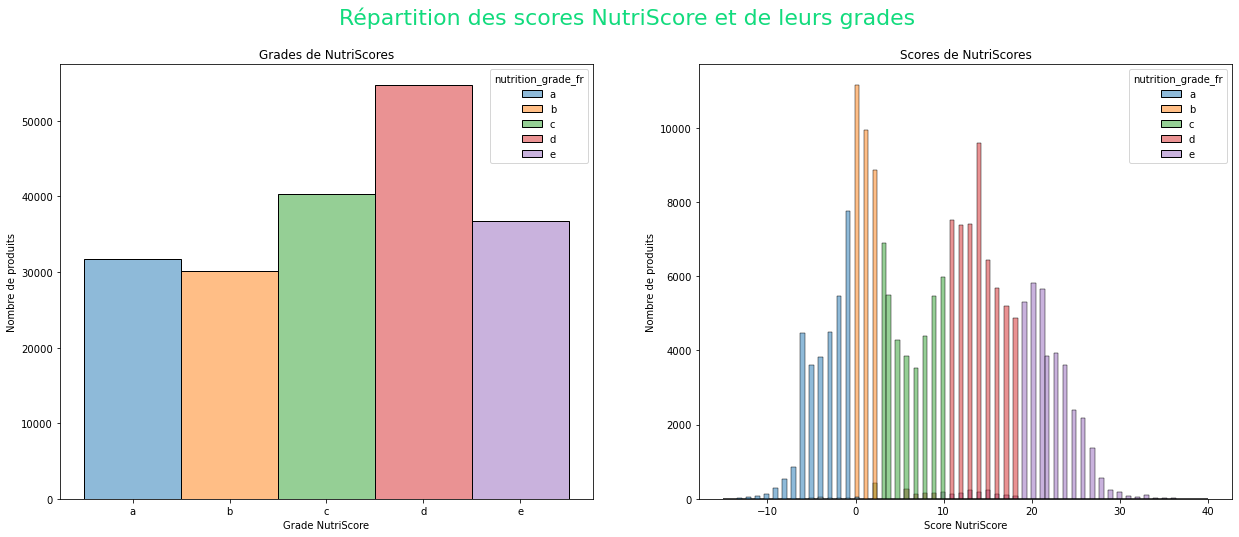

In [19]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(21,8))
fig.suptitle(r"Répartition des scores NutriScore et de leurs grades" "\n", fontdict=font_title, fontsize=22)

sns.histplot(data=datas_nutri.sort_values("nutrition_grade_fr"), x="nutrition_grade_fr", hue="nutrition_grade_fr", ax=axes[0])
axes[0].set_title('Grades de NutriScores')
axes[0].set_xlabel("Grade NutriScore")
axes[0].set_ylabel("Nombre de produits")

sns.histplot(data=datas_nutri.sort_values("nutrition_grade_fr"), x="nutrition-score-fr_100g", hue="nutrition_grade_fr", ax=axes[1])
axes[1].set_title('Scores de NutriScores')
axes[1].set_xlabel("Score NutriScore")
axes[1].set_ylabel("Nombre de produits")

plt.show()

Le 1er graphique montre que le grade 'D' est légèrement plus représenté que les autres grades

Le 2e graphique permet de visualiser la distribution de la variable "NutriScore" (analyse univariée)

On va affiner l'analyse en intégrant les catégories de produits :

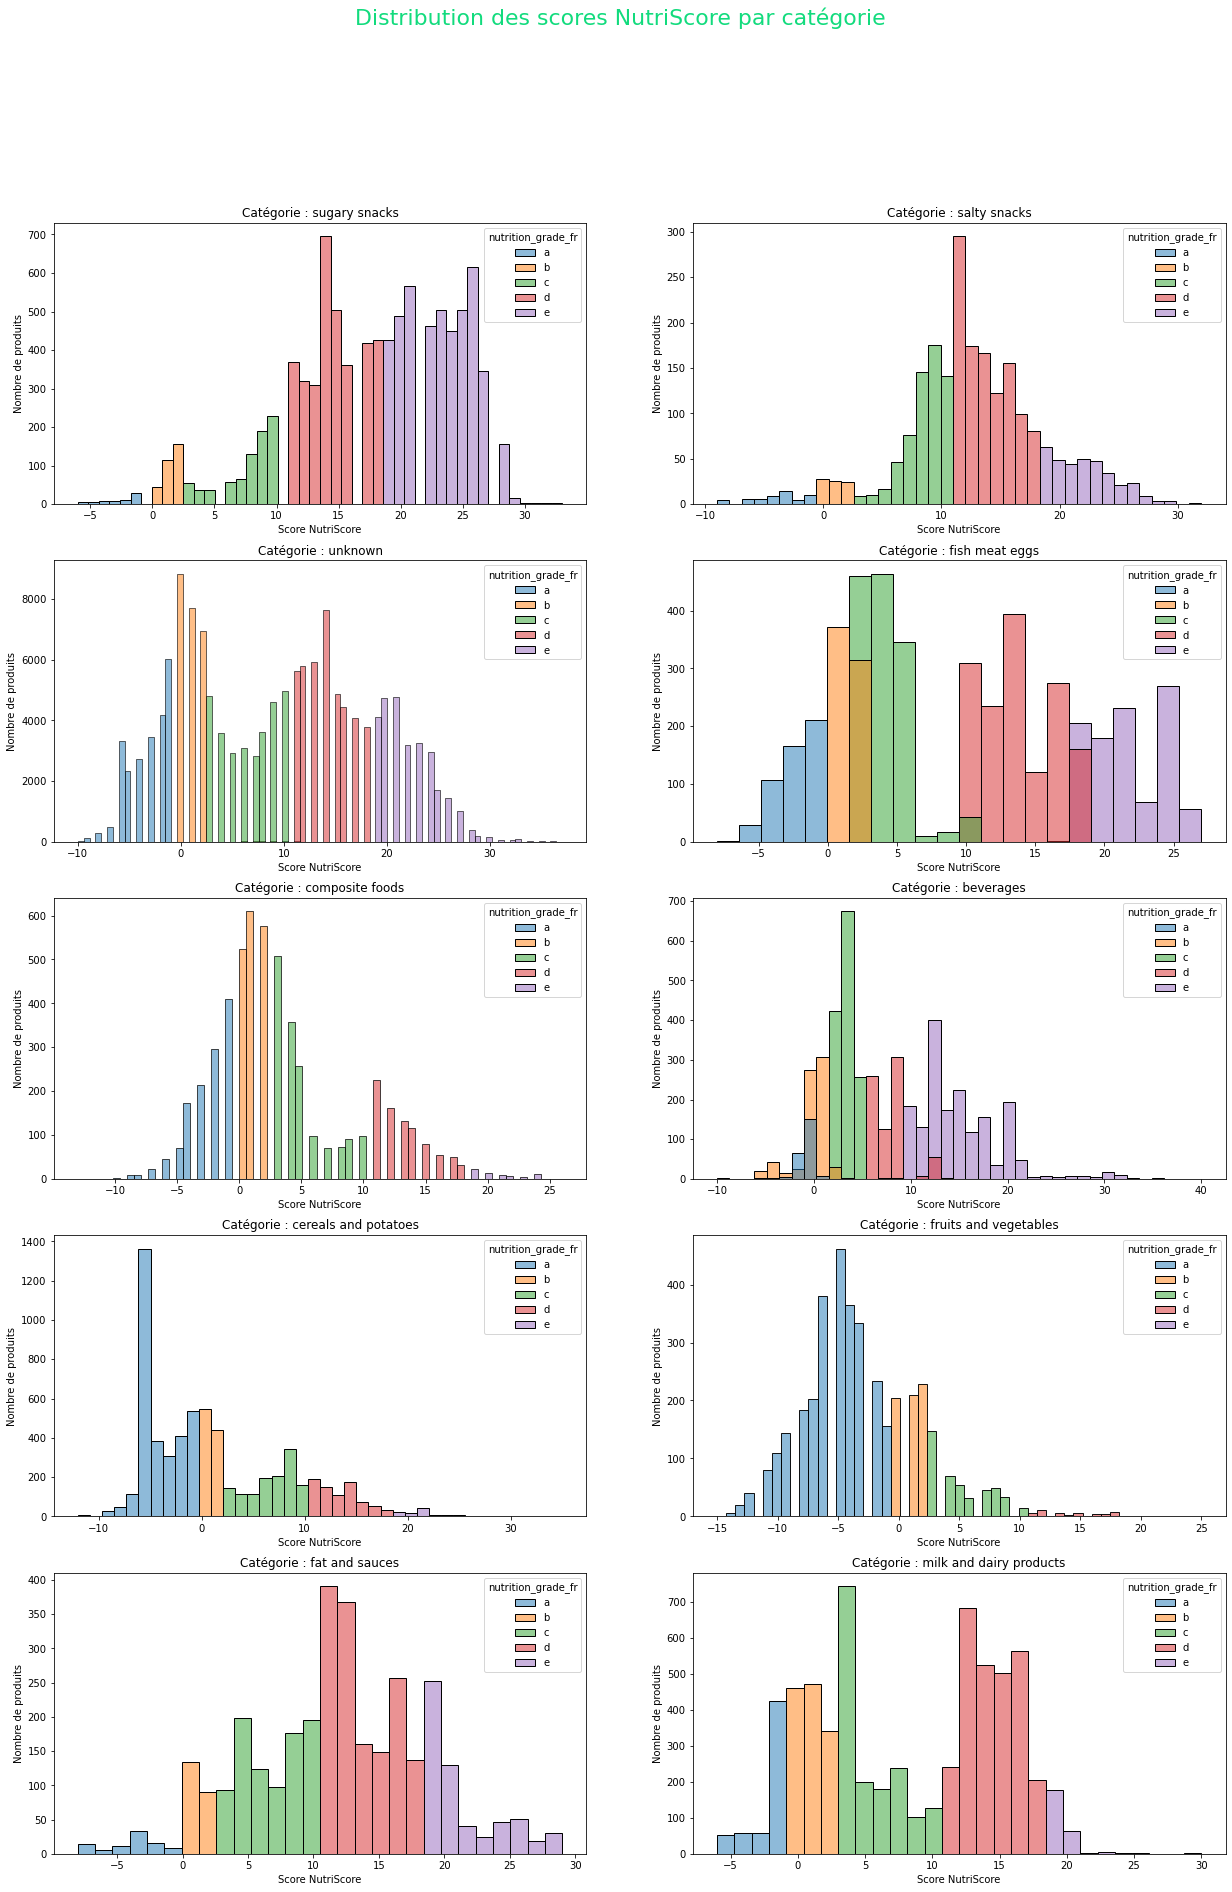

In [21]:
n_sub = len(datas_nutri['pnns_groups_1'].unique())
n_col = 2
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(21,int(3*n_sub)))
axes = np.array(axes)
fig.suptitle("Distribution des scores NutriScore par catégorie", fontdict=font_title, fontsize=22)
i=0
for ax in axes.reshape(-1):
    cat = datas_nutri['pnns_groups_1'].unique()[i]
    subset = datas_nutri[datas_nutri['pnns_groups_1']==cat].sort_values("nutrition_grade_fr")
    sns.histplot(data=subset, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", ax=ax)
    ax.set_title('Catégorie : {}'.format(cat))
    ax.set_xlabel("Score NutriScore")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

Intuitivement, il semble qu'il y ait un lien entre catégorie de produits et nutriscore.

Ex. 'fats and sauces' plutôt représentée par des produits aux grades 'D' et 'E' 
'fruits and vegetables' plutôt représentée par des produits au grade 'A'

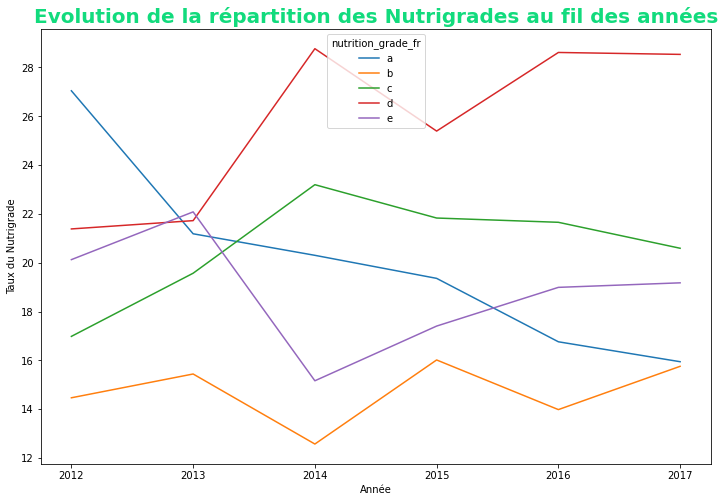

In [22]:
ng_per_year = datas_nutri[['code','nutrition_grade_fr']].groupby(by=['nutrition_grade_fr',datas_nutri['last_modified_datetime'].dt.year]).nunique().reset_index()
cum_per_year = datas_nutri[['code']].groupby(by=datas_nutri['last_modified_datetime'].dt.year).nunique().reset_index()
ng_per_year = pd.merge(ng_per_year, cum_per_year, how="left", left_on="last_modified_datetime", right_on="last_modified_datetime")
ng_per_year = ng_per_year.rename(columns={'last_modified_datetime':'year', 'code_x':'nb_nutrigrade', 'code_y':'total_grade'})
ng_per_year['nutrigrade_rate'] = (ng_per_year['nb_nutrigrade'] / ng_per_year['total_grade'])*100

fig =plt.figure(figsize=(12,8))
ax = sns.lineplot(x='year', y='nutrigrade_rate', hue='nutrition_grade_fr', data=ng_per_year)
plt.xlabel("Année")
plt.ylabel("Taux du Nutrigrade")
plt.title("Evolution de la répartition des Nutrigrades au fil des années", fontdict=font_title)
plt.show()


Remarque : le jeu de données n'a pas de produits créés depuis 2017 (date du fichier mis à disposition sur OC)

De manière contre-intuitive, les "bons" nutriscores ont plutôt stagné ('B') voire fortement diminué ('A') au contraire du 'D' depuis 2012

## ANOVA

Analyse du lien entre catégorie (variable qualitative) et nutriscore (variable quantitative)

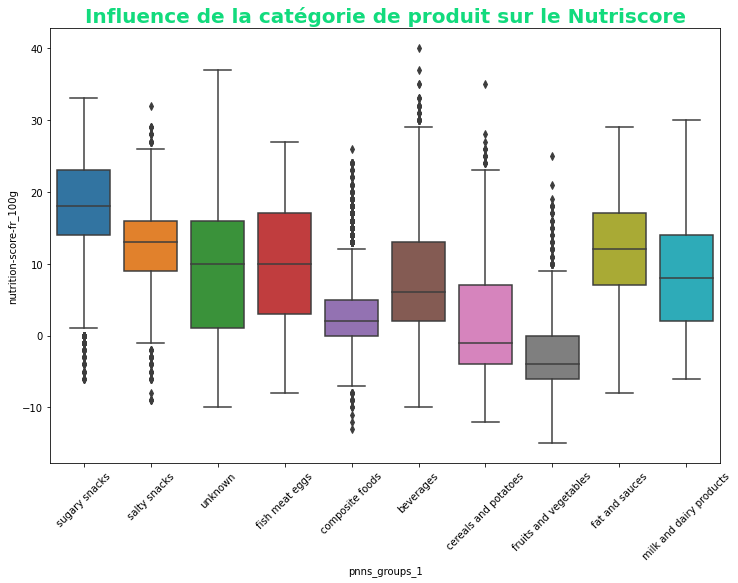

In [23]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=datas_nutri, x='pnns_groups_1', y='nutrition-score-fr_100g')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit sur le Nutriscore", fontdict=font_title)
plt.show()

In [24]:
datas_nutri.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g'}, inplace=True)

C:\Users\laure\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
datas_nutri.head()

code last_modified_datetime   creator    created_datetime  \
0  3760029248001    2016-12-23 16:38:19  stephane 2012-01-31 14:43:58   
1  3029330062806    2016-12-23 16:38:19  stephane 2012-02-09 10:34:56   
2  3257980112590    2016-03-26 18:23:42  marianne 2012-02-11 14:51:07   
3  3160181210524    2014-06-27 16:50:06  stephane 2012-02-11 18:51:58   
4  7613031264285    2014-12-31 03:07:48     andre 2012-02-12 08:51:55   

                                                 url  \
0  http://world-fr.openfoodfacts.org/produit/3760...   
1  http://world-fr.openfoodfacts.org/produit/3029...   
2  http://world-fr.openfoodfacts.org/produit/3257...   
3  http://world-fr.openfoodfacts.org/produit/3160...   
4  http://world-fr.openfoodfacts.org/produit/7613...   

                                           states_fr countries_fr  \
0  A vérifier,Complet,Informations nutritionnelle...       France   
1  A compléter,Informations nutritionnelles compl...       France   
2  A vérifier,Complet,Informations nutritionnelle...       France   
3  A vérifier,Complet,Informations nutritionnelle...       France   
4  A vérifier,Complet,Informations nutritionnelle...      Pologne   

                                        product_name          brands  \
0  Caramels tendres au beurre salé au sel de Guér...      Carabreizh   
1            Jacquet Les bouchées créatives à garnir         Jacquet   
2                                           Boudoirs            Cora   
3                      Cookies tout chocolat Biocoop         Biocoop   
4                              SMACZNA ZUPA Grochova  WINIARY,Nestlé   

   energy_100g  ...  nutrition_score_fr_100g  fiber_100g   additives_tags  \
0       1717.0  ...                     28.0         1.1        e500,e322   
1       1898.0  ...                      9.0         3.0             e920   
2       1637.0  ...                     13.0         1.5  e450i,e500,e503   
3       2040.0  ...                     19.0         5.5        e322,e503   
4        159.0  ...                      3.0         0.7  e1400,e621,e635   

        pnns_groups_2  pnns_groups_1  \
0              sweets  sugary snacks   
1          appetizers   salty snacks   
2  biscuits and cakes  sugary snacks   
3  biscuits and cakes  sugary snacks   
4             unknown        unknown   

                                       categories_fr        main_category_fr  \
0        Epicerie,Snacks sucrés,Confiseries,Caramels                Epicerie   
1           Snacks salés,Apéritif,Biscuits apéritifs            Snacks salés   
2  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...                Biscuits   
3  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...                 Cookies   
4                             pl:Soupes-deshydratees  pl:Soupes-deshydratees   

  additives_n2  fruits-legumes-ratio_100g  sat-fat_ratio  
0            2                         20       0.642202  
1            1                         20       0.083871  
2            3                         20       0.281250  
3            2                         20       0.560000  
4            3                         20       0.375000  

[5 rows x 28 columns]

In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

anova_category = smf.ols('nutrition_score_fr_100g~pnns_groups_1', data=datas_nutri).fit()
print(anova_category.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.118
Model:                                 OLS   Adj. R-squared:                  0.117
Method:                      Least Squares   F-statistic:                     2865.
Date:                     Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                             20:56:32   Log-Likelihood:            -6.8895e+05
No. Observations:                   193684   AIC:                         1.378e+06
Df Residuals:                       193674   BIC:                         1.378e+06
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [27]:
#Tableau d'analyse de variance
sm.stats.anova_lm(anova_category, typ=2)

sum_sq        df            F  PR(>F)
pnns_groups_1  1.856196e+06       9.0  2865.429279     0.0
Residual       1.394001e+07  193674.0          NaN     NaN

PR(>F) correspond à une p-value de 0, l'hypothèse retenue est bien l'hypothèse alternative à savoir que la catégorie pnns a bien une influence sur le Nutriscore

## analyse des corrélations

Par exemple, on va voir si l'on trouve un lien entre 'energy_100g' et 'fat_100g', ce qui devrait être le cas physiologiquement parlant (hors impact des glucides sur le niveau global d'énergie)

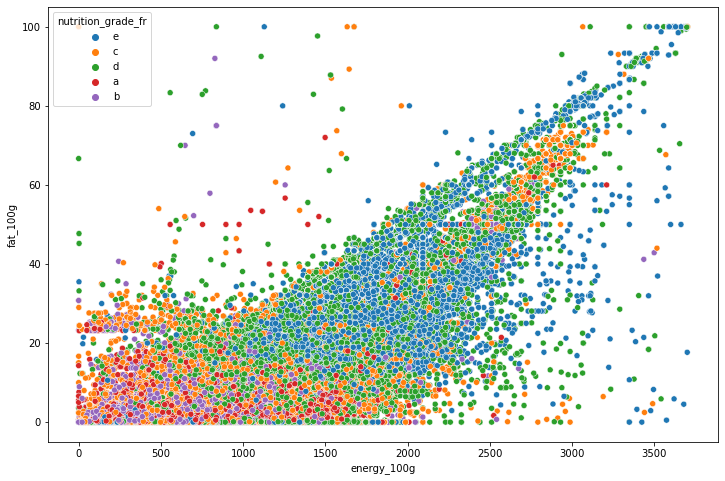

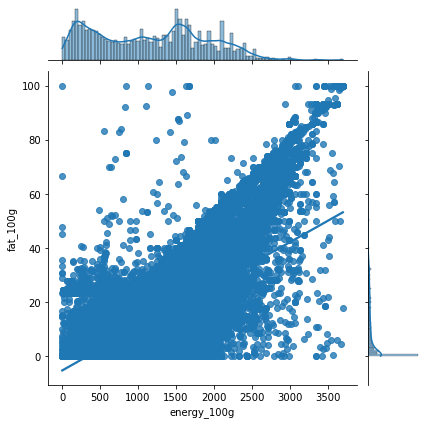

In [46]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = datas_nutri, x = 'energy_100g', y = 'fat_100g', hue = "nutrition_grade_fr")
sns.jointplot(data=datas_nutri, x = 'energy_100g', y = 'fat_100g', kind='reg')
plt.show()

En utilisant la méthode 'pairplot', on va généraliser ce type d'analyse variable par variable (analyse bi-variée) :

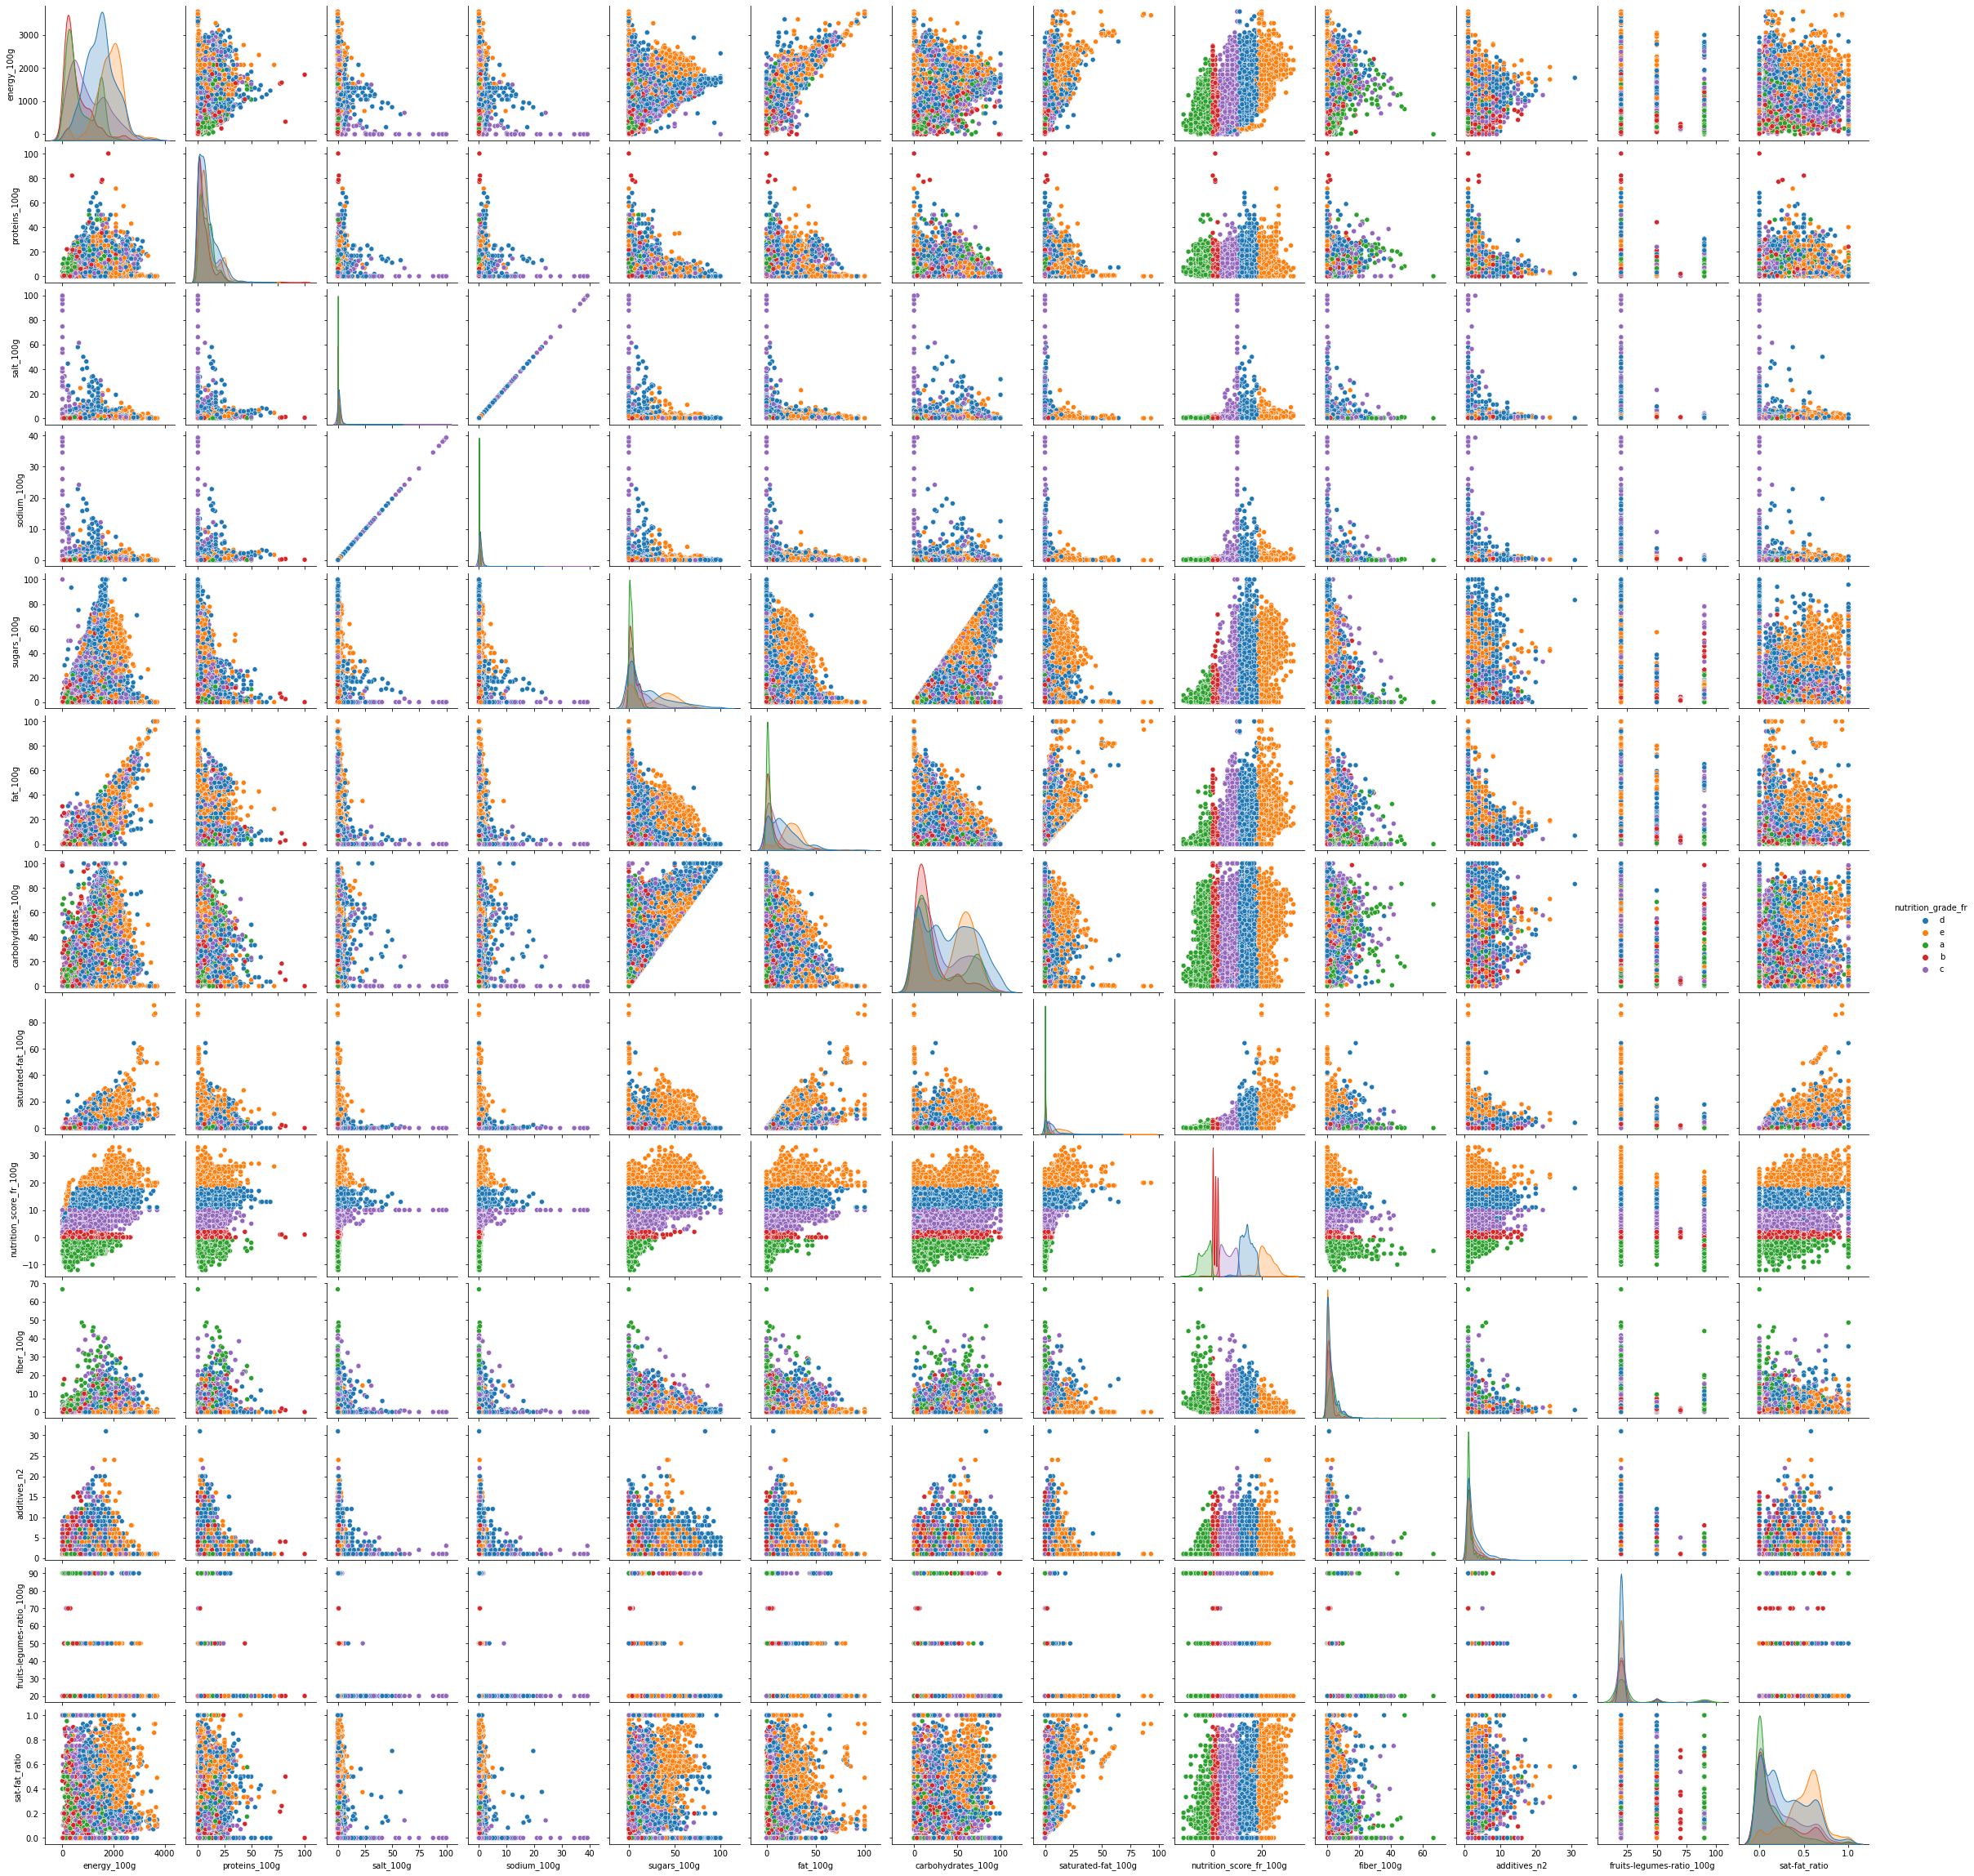

In [42]:
sns.pairplot(datas_nutri.sample(frac=0.05), hue="nutrition_grade_fr")

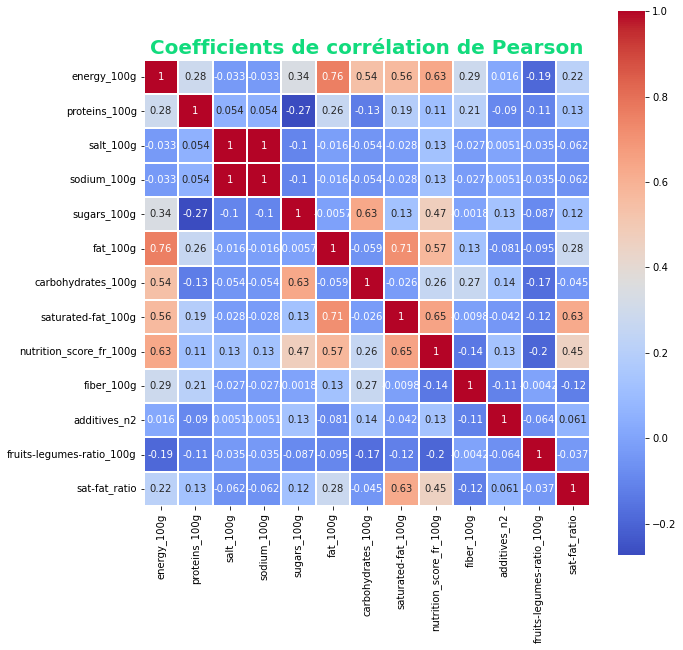

In [47]:
#Matrice des corrélations
corr_mat = datas_nutri.corr()
#heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

Le tableau confirme la corrélation directe entre 'salt' et 'sodium' (rapport de 2.5 pour info)

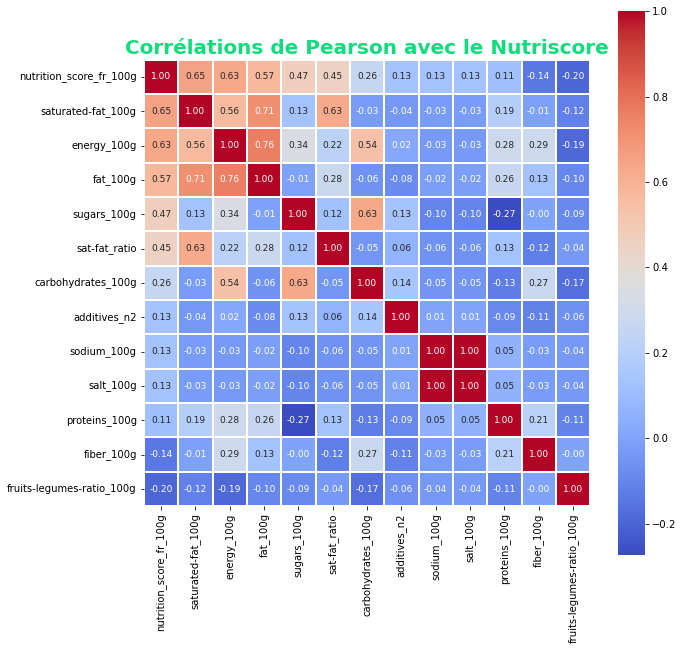

In [48]:
fig = plt.figure(figsize=(10,10))
cols = corr_mat.nlargest(15,'nutrition_score_fr_100g')['nutrition_score_fr_100g'].index
corr_nutriscore = corr_mat.loc[cols, cols]
sns.heatmap(corr_nutriscore, cbar=True, annot=True,
            fmt='.2f', annot_kws={'size': 9},
            square=True, linewidths=0.01, cmap='coolwarm')
plt.title("Corrélations de Pearson avec le Nutriscore", fontdict=font_title)
plt.show()

On voit bien ici que le nutriscore est plus fortement corrélé aux niveaux d'énergie et de lipides (saturated-fat davantage) et à niveau moindre du niveau de sucres. Cela confirme bien que le nutriscore peut être effectivement utilisé pour limiter la consommation de graisses saturées et de sucre.

En effet, un gramme de lipides renferme plus de deux fois plus d'énergie qu'un gramme de glucides ou de protéines (9 calories pour 1 g de lipides, 4 calories pour 1 g de glucides ou de protéines)

## Régression linéaire multivariée

In [97]:
# Nous partons du dataset dont les nutriscores sont complétés.
numerical_features = datas_nutri.select_dtypes(include=['float64','int64'])

y = numerical_features['nutrition_score_fr_100g'].values
X = numerical_features.drop('nutrition_score_fr_100g', axis=1)

Pour une meilleure stabilité et éviter le pb de multicolinéarité, on va supprimer les variables 'salt', 'fat' et 'carbohydrates'
on supprime également 'additives_n2' qui ne rentre pas dans le calcul du nutriscore

In [98]:
X.drop(['salt_100g','carbohydrates_100g','fat_100g', 'additives_n2'], axis=1, inplace=True)

1ere étape : standardisation

In [99]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193684 entries, 0 to 222098
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   energy_100g                193684 non-null  float64
 1   proteins_100g              193684 non-null  float64
 2   salt_100g                  193684 non-null  float64
 3   sodium_100g                193684 non-null  float64
 4   sugars_100g                193684 non-null  float64
 5   fat_100g                   193684 non-null  float64
 6   carbohydrates_100g         193684 non-null  float64
 7   saturated-fat_100g         193684 non-null  float64
 8   nutrition_score_fr_100g    193684 non-null  float64
 9   fiber_100g                 193684 non-null  float64
 10  additives_n2               193684 non-null  int64  
 11  fruits-legumes-ratio_100g  193684 non-null  int64  
 12  sat-fat_ratio              193684 non-null  float64
dtypes: float64(11), int64(2)
memo

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

2e étape : création du jeu d'entraînement et du jeu de test

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) 
#42, hitch hiker's guide to the galaxy :)

3e étape : Création de la Baseline

In [102]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
dummy_pred = dummy_reg.predict(X_test)

In [103]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "R²"], "Résultats":[mae, mse, rmse, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [104]:
dummy_metrics = metrics_model(y_test, dummy_pred).rename(columns={'Résultats':'Baseline'})
dummy_metrics

Métrique   Baseline
0      MAE   7.810103
1      MSE  81.606649
2     RMSE   9.033640
3       R²  -0.000029

4e étape : Régression linéaire

In [105]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [106]:
lr_metrics = metrics_model(y_test, lr_pred).rename(columns={'Résultats':'LinearRegression'})
lr_metrics = pd.concat([dummy_metrics,lr_metrics['LinearRegression']], axis=1)
lr_metrics

Métrique   Baseline  LinearRegression
0      MAE   7.810103          3.741525
1      MSE  81.606649         23.868681
2     RMSE   9.033640          4.885558
3       R²  -0.000029          0.707507

on voit qu'on a de bien meilleurs résultats que par rapport à la baseline

avec un coefficient R² de 0.71, nous avons une base plutôt correct sur laquelle s'appuyer

In [107]:
def plot_pred_true(y_true, y_pred):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Projection des valeurs prédites en fonction des valeurs réélles", fontdict=font_title, fontsize=18)
    plt.show()

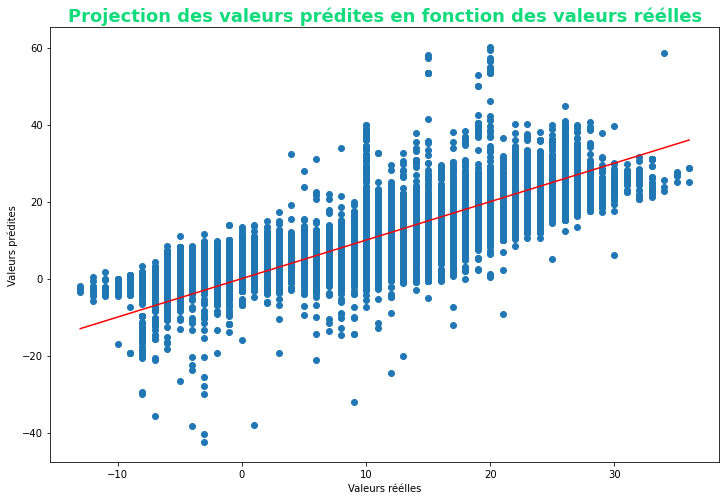

In [108]:
plot_pred_true(y_true=y_test, y_pred=lr_pred)

Les valeurs restent relativement dispersées. On va essayer d'affiner en intégrant les catégories de produits

5e étape : Régression linéaire avec catégorie de produits

Pour être utilisée dans le modèle, la catégorie de produits doit être "numérisée". Pour cela, on va utiliser la méthode "one hot encoder"

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = list(X.columns)
numerical_transformer = StandardScaler()

categorical_features = list(['pnns_groups_1', 'pnns_groups_2'])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

X = datas_nutri[numerical_features + categorical_features]
y = datas_nutri['nutrition_score_fr_100g']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

pipeline_lr.fit(X_train, y_train)
plr_pred = pipeline_lr.predict(X_test)

plr_metrics = metrics_model(y_test, plr_pred).rename(columns={'Résultats':'LinearRegression cat'})
plr_metrics = pd.concat([lr_metrics,plr_metrics['LinearRegression cat']], axis=1)
plr_metrics

Métrique   Baseline  LinearRegression  LinearRegression cat
0      MAE   7.810103          3.741525              3.382589
1      MSE  81.606649         23.868681             19.987402
2     RMSE   9.033640          4.885558              4.470727
3       R²  -0.000029          0.707507              0.755069

R² est supérieur dans ce 2e modèle, on a donc bien une amélioration avec la catégorie de produits, ce qui correspond à ce qu'on a vu lors de l'analyse ANOVA

## Analyse ACP

In [114]:
from sklearn.decomposition import PCA

#Centrage et réduction
X = datas_nutri.select_dtypes(include=['float64','int64'])
X.drop(['additives_n2'], axis=1, inplace=True)
X_scaled = scaler.fit_transform(X)

#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled)

C:\Users\laure\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193684 entries, 0 to 222098
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   energy_100g                193684 non-null  float64
 1   proteins_100g              193684 non-null  float64
 2   salt_100g                  193684 non-null  float64
 3   sodium_100g                193684 non-null  float64
 4   sugars_100g                193684 non-null  float64
 5   fat_100g                   193684 non-null  float64
 6   carbohydrates_100g         193684 non-null  float64
 7   saturated-fat_100g         193684 non-null  float64
 8   nutrition_score_fr_100g    193684 non-null  float64
 9   fiber_100g                 193684 non-null  float64
 10  fruits-legumes-ratio_100g  193684 non-null  int64  
 11  sat-fat_ratio              193684 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 23.2 MB


1ère étape : Eboulis des valeurs propres

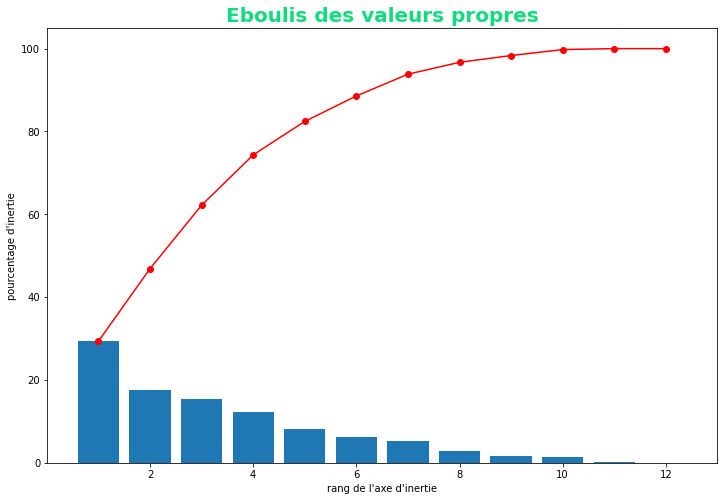

In [116]:
#Variances expliquées
varexpl = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", fontdict=font_title)
plt.show(block=False)

In [117]:
print("Le premier plan factoriel couvrira une inertie de {:.2f}%, le second plan : {:.2f}% et le troisième plan : {:.2f}%.".format(varexpl[0:2].sum(),
                                                                                                     varexpl[0:4].sum(), varexpl[0:6].sum()))

Le premier plan factoriel couvrira une inertie de 46.86%, le second plan : 74.34% et le troisième plan : 88.57%.


2e étape : Cercle des corrélations

In [118]:
#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3], 'CORR_F5':corvar[:,4], 'CORR_F6':corvar[:,5]})
corr_matrix

feature   CORR_F1   CORR_F2   CORR_F3   CORR_F4  \
0                 energy_100g  0.877154 -0.083063  0.149669  0.314162   
1               proteins_100g  0.265013  0.280275 -0.353797  0.544064   
2                   salt_100g -0.020741  0.891614  0.442743 -0.023656   
3                 sodium_100g -0.020742  0.891613  0.442744 -0.023656   
4                 sugars_100g  0.416332 -0.421749  0.611617 -0.304857   
5                    fat_100g  0.783262  0.160758 -0.316189  0.176075   
6          carbohydrates_100g  0.360288 -0.415476  0.729471  0.159821   
7          saturated-fat_100g  0.820450  0.134752 -0.337597 -0.170749   
8     nutrition_score_fr_100g  0.845117  0.117194  0.123915 -0.295066   
9                  fiber_100g  0.123698 -0.118318  0.150350  0.787900   
10  fruits-legumes-ratio_100g -0.257094 -0.021257 -0.174008 -0.097741   
11              sat-fat_ratio  0.543816  0.063446 -0.331043 -0.409038   

     CORR_F5   CORR_F6  
0   0.074381 -0.175520  
1  -0.188035  0.337189  
2   0.066618  0.030592  
3   0.066618  0.030591  
4   0.079702  0.107146  
5   0.119436 -0.412481  
6   0.015935  0.134538  
7   0.070469  0.016413  
8  -0.018926 -0.059550  
9   0.243531  0.230619  
10  0.913352  0.036888  
11  0.032637  0.576821

In [119]:
#Variable Illustrative
ivNutrigrade = datas_nutri['nutrition_grade_fr'].values

#Encodage des grades
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ivNutrigrade = encoder.fit_transform(ivNutrigrade)
ivNutrigrade = ivNutrigrade.reshape((ivNutrigrade.shape[0],1))

#Corrélation de la variable illustrative avec les axes factoriels 
corrIv = np.zeros((ivNutrigrade.shape[1],p))
for j in range(p): 
    for k in range(ivNutrigrade.shape[1]): 
        corrIv[k,j] = np.corrcoef(ivNutrigrade[:,k],X_projected[:,j])[0,1]

In [91]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0, 
               illustrative_var_label=None, illustrative_var_corr=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig=plt.figure(figsize=(10,10))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                plt.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #variable illustrative
            if illustrative_var_label is not None :
                plt.annotate(illustrative_var_label,
                             (illustrative_var_corr[0,d1],illustrative_var_corr[0,d2]),
                             color='g')
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                                   illustrative_var_corr[0,d1],illustrative_var_corr[0,d2], 
                                   angles='xy', scale_units='xy', scale=1, color="g", alpha=0.5)

            #ajouter les axes 
            plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)

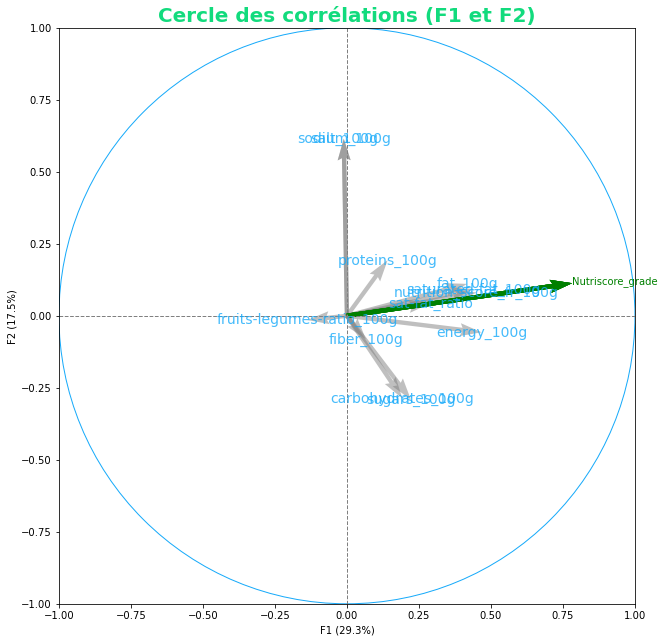

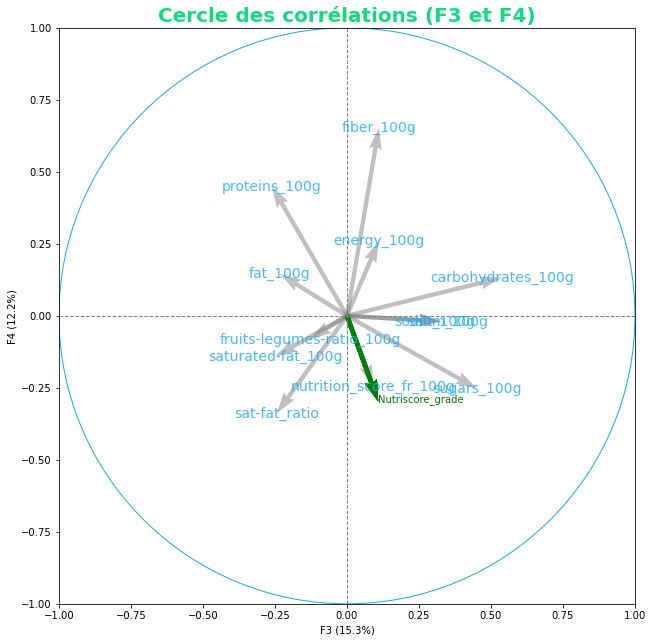

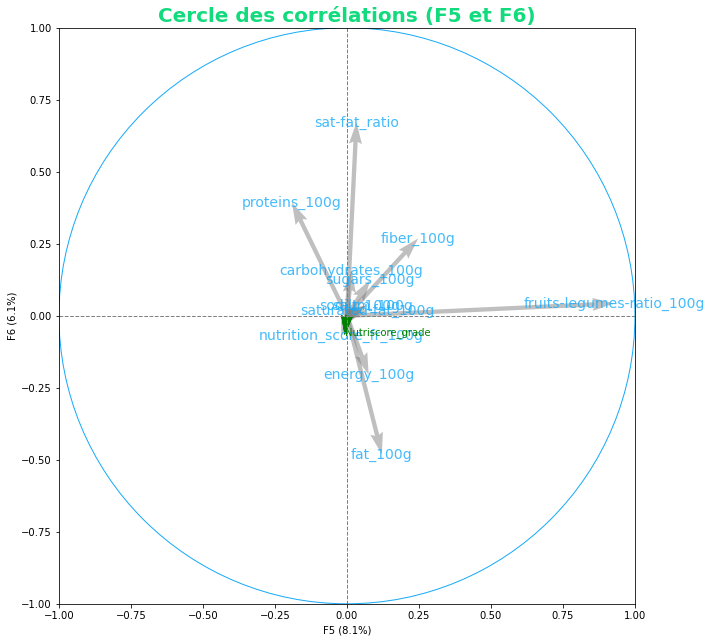

In [120]:
cerle_corr(pcs, 6, pca, [(0,1),(2,3),(4,5)], labels = np.array(X.columns), 
           illustrative_var_label="Nutriscore_grade", illustrative_var_corr = corrIv)

In [121]:
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)

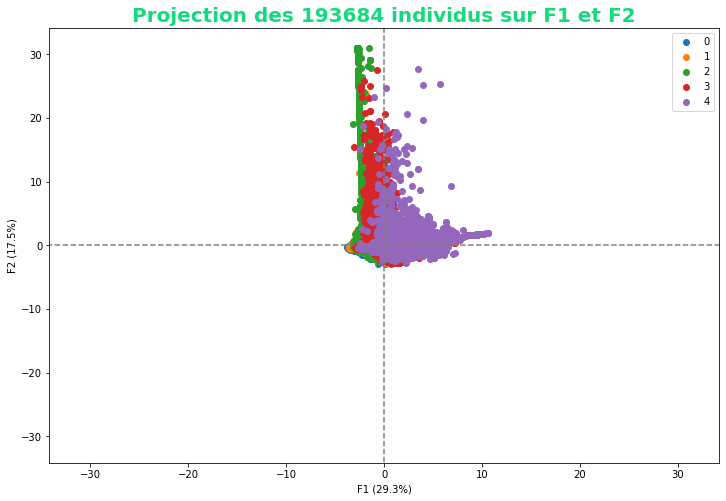

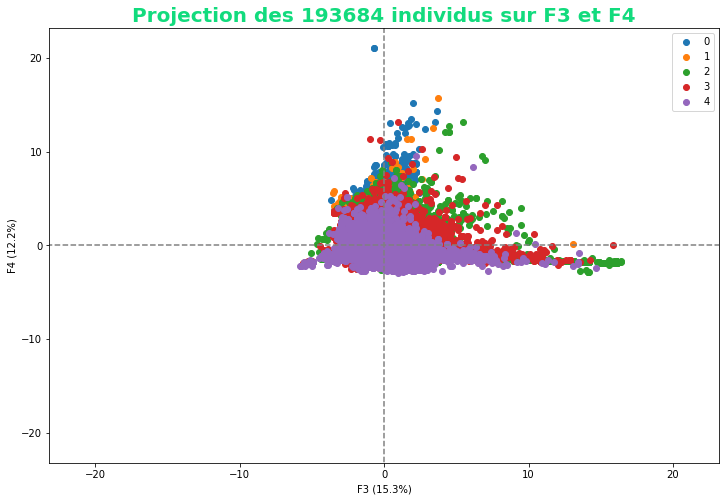

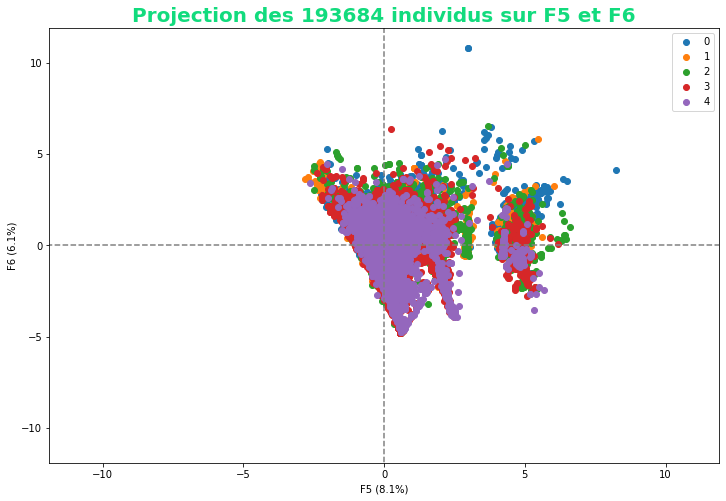

In [122]:
plot_plans_factoriels(X_projected, 6, pca, [(0,1),(2,3),(4,5)], illustrative_var = ivNutrigrade)

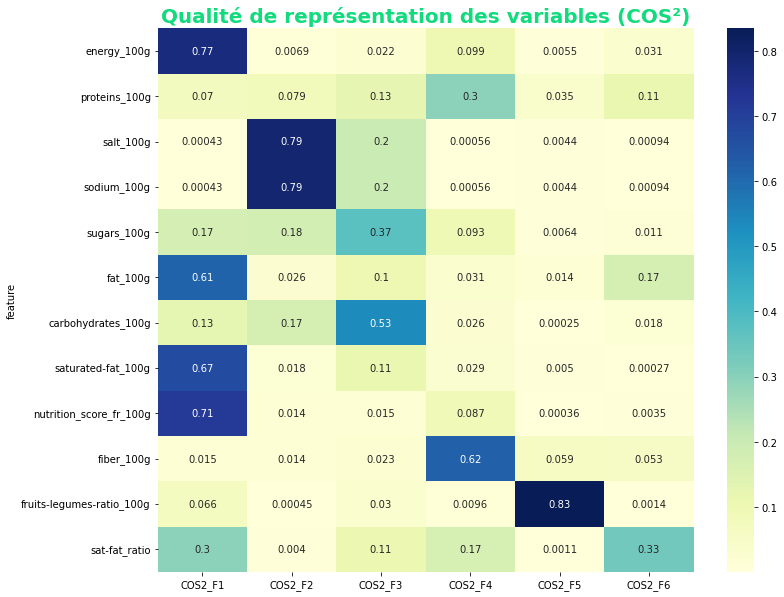

In [123]:
#Calcul des COS²
cos2var = corvar**2
df_cos2var = pd.DataFrame({'feature':X.columns,'COS2_F1':cos2var[:,0],
                           'COS2_F2':cos2var[:,1], 'COS2_F3':cos2var[:,2],
                           'COS2_F4':cos2var[:,3], 'COS2_F5':cos2var[:,4], 'COS2_F6':cos2var[:,5]}).set_index('feature')

#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_cos2var, annot=True, cmap="YlGnBu")
plt.title("Qualité de représentation des variables (COS²)", fontdict=font_title)
plt.show()

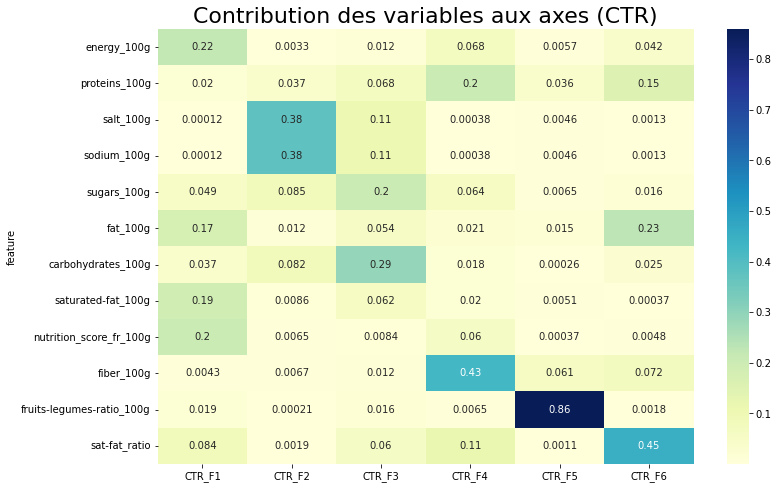

In [124]:
#contributions 
ctrvar = cos2var 
for k in range(p): 
    ctrvar[:,k] = ctrvar[:,k]/pca.explained_variance_[k] 

df_ctrvar = pd.DataFrame({'feature':X.columns,'CTR_F1':ctrvar[:,0],'CTR_F2':ctrvar[:,1],
                         'CTR_F3':ctrvar[:,2], 'CTR_F4':ctrvar[:,3], 'CTR_F5':ctrvar[:,4], 'CTR_F6':ctrvar[:,5]}).set_index('feature')

#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_ctrvar, annot=True, cmap="YlGnBu")
plt.title("Contribution des variables aux axes (CTR)", fontsize=22)
plt.show()

In [125]:
df_syn_var = pd.DataFrame(X_projected[:,:6], index=datas_nutri.index, 
                          columns=["F"+str(i+1) for i in range(6)])
datas_extend = pd.concat([datas_nutri, df_syn_var], axis=1)
datas_extend.head()

code last_modified_datetime   creator    created_datetime  \
0  3760029248001    2016-12-23 16:38:19  stephane 2012-01-31 14:43:58   
1  3029330062806    2016-12-23 16:38:19  stephane 2012-02-09 10:34:56   
2  3257980112590    2016-03-26 18:23:42  marianne 2012-02-11 14:51:07   
3  3160181210524    2014-06-27 16:50:06  stephane 2012-02-11 18:51:58   
4  7613031264285    2014-12-31 03:07:48     andre 2012-02-12 08:51:55   

                                                 url  \
0  http://world-fr.openfoodfacts.org/produit/3760...   
1  http://world-fr.openfoodfacts.org/produit/3029...   
2  http://world-fr.openfoodfacts.org/produit/3257...   
3  http://world-fr.openfoodfacts.org/produit/3160...   
4  http://world-fr.openfoodfacts.org/produit/7613...   

                                           states_fr countries_fr  \
0  A vérifier,Complet,Informations nutritionnelle...       France   
1  A compléter,Informations nutritionnelles compl...       France   
2  A vérifier,Complet,Informations nutritionnelle...       France   
3  A vérifier,Complet,Informations nutritionnelle...       France   
4  A vérifier,Complet,Informations nutritionnelle...      Pologne   

                                        product_name          brands  \
0  Caramels tendres au beurre salé au sel de Guér...      Carabreizh   
1            Jacquet Les bouchées créatives à garnir         Jacquet   
2                                           Boudoirs            Cora   
3                      Cookies tout chocolat Biocoop         Biocoop   
4                              SMACZNA ZUPA Grochova  WINIARY,Nestlé   

   energy_100g  ...        main_category_fr  additives_n2  \
0       1717.0  ...                Epicerie             2   
1       1898.0  ...            Snacks salés             1   
2       1637.0  ...                Biscuits             3   
3       2040.0  ...                 Cookies             2   
4        159.0  ...  pl:Soupes-deshydratees             3   

   fruits-legumes-ratio_100g  sat-fat_ratio        F1        F2        F3  \
0                         20       0.642202  2.353101 -0.683327  1.700517   
1                         20       0.083871  0.236473 -0.122905  0.848691   
2                         20       0.281250  0.797823 -1.479621  2.121698   
3                         20       0.560000  2.667638 -0.586350  0.327355   
4                         20       0.375000 -1.889905  0.205816 -0.685165   

         F4        F5        F6  
0 -1.608266  0.029675  0.803563  
1  1.025231 -0.218903 -0.598192  
2 -0.433640 -0.214224  0.566187  
3 -0.099814  0.294341  0.414306  
4 -0.907734 -0.515490  0.253165  

[5 rows x 34 columns]

In [127]:
#Les variables synthétiques sont déjà standardisées
numerical_features = ['F1','F2','F3','F4', 'F5', 'F6']

categorical_features = list(['pnns_groups_1', 'pnns_groups_2'])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

pipeline_lr_pca = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

X = datas_extend[numerical_features + categorical_features]
y = datas_extend['nutrition_score_fr_100g']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

pipeline_lr_pca.fit(X_train, y_train)
plr_pca_pred = pipeline_lr_pca.predict(X_test)

plr_pca_metrics = metrics_model(y_test, plr_pca_pred).rename(columns={'Résultats':'LinearRegression PCA'})
plr_pca_metrics = pd.concat([plr_metrics,plr_pca_metrics['LinearRegression PCA']], axis=1)
plr_pca_metrics

Métrique   Baseline  LinearRegression  LinearRegression cat  \
0      MAE   7.810103          3.741525              3.382589   
1      MSE  81.606649         23.868681             19.987402   
2     RMSE   9.033640          4.885558              4.470727   
3       R²  -0.000029          0.707507              0.755069   

   LinearRegression PCA  
0              6.968916  
1             69.494500  
2              8.336336  
3              0.148397

R² est faible, il n'est donc pas pertinent d'utiliser les variables synthétiques

Ceci s'explique notamment par le fait que nous avons déjà réduit le nb  de variables aux plus pertinentes pour le calcul du NutriScore

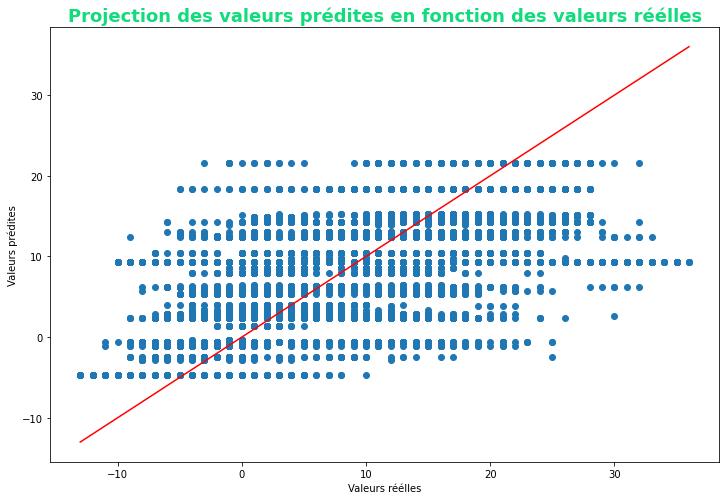

In [128]:
plot_pred_true(y_true=y_test, y_pred=plr_pca_pred)